<a href="https://colab.research.google.com/github/ARYAMANN7279/ARYAMANN7279/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


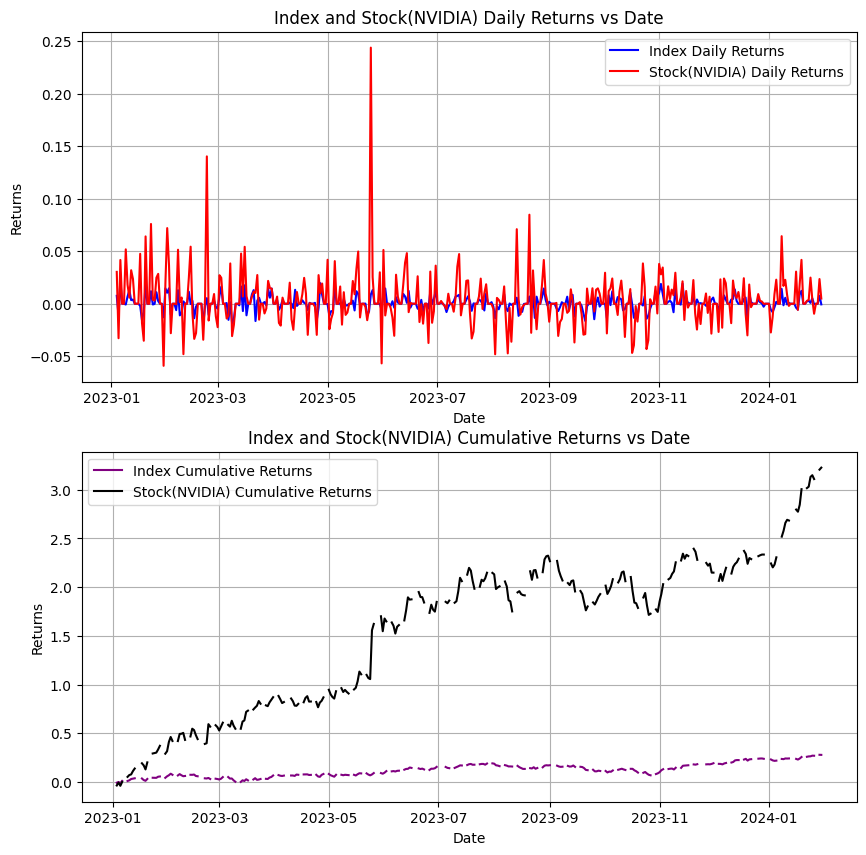

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt

def hourly_to_daily(stock_data, index_data):
    stock_daily_data = stock_data.resample('D').last()
    index_daily_data = index_data.resample('D').last()
    return stock_daily_data, index_daily_data
def calculate_daily_returns(daily_data):
    daily_returns = daily_data['Close'].pct_change()
    return daily_returns
def calculate_cumulative_returns(closing_prices, first_open):
    cumulative_returns = (closing_prices - first_open) / first_open
    return cumulative_returns

name = "NVIDIA"
index_ticker = "^GSPC"
stock_ticker = "NVDA"
start_date = "2023-01-01"
end_date = "2024-01-31"

index_data = yf.download(index_ticker, start_date, end_date, "1h")
stock_data = yf.download(stock_ticker, start_date, end_date, "1h")
stock_daily_data, index_daily_data = hourly_to_daily(stock_data, index_data)
index_daily_returns = calculate_daily_returns(index_daily_data)
stock_daily_returns = calculate_daily_returns(stock_daily_data)
first_open_stock = stock_daily_data['Open'].iloc[0]
first_open_index = index_daily_data['Open'].iloc[0]
index_cumulative_returns = calculate_cumulative_returns(index_daily_data['Close'], first_open_index)
stock_cumulative_returns = calculate_cumulative_returns(stock_daily_data['Close'], first_open_stock)

figure,graph= plt.subplots(2, 1, figsize=(10, 10))
graph[0].plot(index_daily_returns.index, index_daily_returns, label='Index Daily Returns', color='blue')
graph[0].plot(stock_daily_returns.index, stock_daily_returns, label=f'Stock({name}) Daily Returns', color='red')
graph[0].set_title(f'Index and Stock({name}) Daily Returns vs Date')
graph[0].set_xlabel('Date')
graph[0].set_ylabel('Returns')
graph[0].grid(True)
graph[0].legend()

graph[1].plot(index_cumulative_returns.index, index_cumulative_returns, linestyle='-', label='Index Cumulative Returns', color='purple')
graph[1].plot(stock_cumulative_returns.index, stock_cumulative_returns, linestyle='-', label=f'Stock({name}) Cumulative Returns', color='black')
graph[1].set_title(f'Index and Stock({name}) Cumulative Returns vs Date')
graph[1].set_xlabel('Date')
graph[1].set_ylabel('Returns')
graph[1].grid(True)
graph[1].legend()

plt.show()


[*********************100%%**********************]  1 of 1 completed


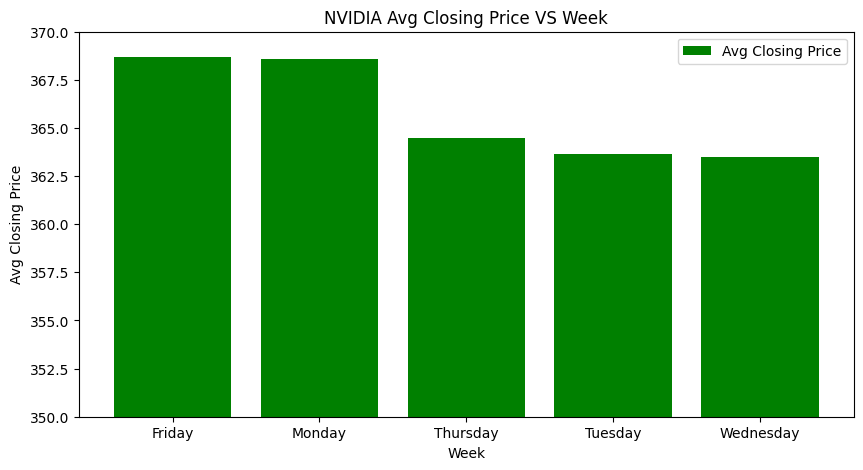

          Date        Open        High         Low       Close   Adj Close  \
0   2023-01-03  148.509995  149.960007  140.960007  143.149994  143.079788   
1   2023-01-04  145.669998  148.529999  142.410004  147.490005  147.417679   
2   2023-01-05  144.910004  145.639999  141.479996  142.649994  142.580048   
3   2023-01-06  144.740005  150.100006  140.339996  148.589996  148.517136   
4   2023-01-09  152.839996  160.559998  151.410004  156.279999  156.203369   
..         ...         ...         ...         ...         ...         ...   
245 2023-12-22  491.950012  493.829987  484.670013  488.299988  488.277069   
246 2023-12-26  489.679993  496.000000  489.600006  492.790009  492.766907   
247 2023-12-27  495.109985  496.799988  490.850006  494.170013  494.146820   
248 2023-12-28  496.429993  498.839996  494.119995  495.220001  495.196777   
249 2023-12-29  498.130005  499.970001  487.510010  495.220001  495.196777   

       Volume  Dividends  Stock Splits Day_of_Week  7-day Rolli

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def add_rolling_column(df,column):
    mean= df[column].rolling(7).mean()#.rolling(),source->internet
    df["7-day Rolling mean"]=mean
    return df

Ticker="NVDA"
data = yf.download(f"{Ticker}","2023-01-01","2024-01-01","1d")
data.to_csv(f"{Ticker}.csv")
df = pd.read_csv(f"{Ticker}.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
s=df.groupby('Day_of_Week')['Close'].mean()
day=s.idxmax()

plt.figure(figsize=(10,5))
plt.bar(s.index,s,color="green",label="Avg Closing Price")
plt.title('NVIDIA Avg Closing Price VS Week')
plt.xlabel('Week')
plt.ylabel('Avg Closing Price')
plt.ylim(350,370)
plt.legend()
plt.show()

add_rolling_column(df,"Close")
print(df)

